In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras
from keras import regularizers
import os 
import tempfile
from keras import applications

In [2]:
#%%
# re-size all the images to this
IMAGE_SIZE = [224, 224]

#%%

callbacks = [ModelCheckpoint(filepath='best_model_MobileNet.h5', monitor='val_loss', save_best_only=True)]
#%%
# add preprocessing layer to the front of VGG
base_model = keras.applications.mobilenet.MobileNet(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

#%%

17227776/17225924 [==============================] - 1s 0us/step


In [3]:
for layer in base_model.layers:
  layer.trainable = False
  
base_model.summary()
 
#%% 

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

#%%
# our layers - you can add more if you want
prediction_layer = tf.keras.layers.Dense(3, activation='softmax')

#%%
# create a model object
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

# view the structure of the model
model.summary()

#%%
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer=optimizers.RMSprop(lr=1e-4),
  metrics=['accuracy']
)


#%%
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

#%%

test_datagen = ImageDataGenerator(rescale = 1./255)


Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [4]:

#%%

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Transfer Learning Codes/Transfer/Train',
                                                 target_size = IMAGE_SIZE,
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

#%%

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Transfer Learning Codes/Transfer/Test',
                                            target_size = IMAGE_SIZE,
                                            batch_size = 32,
                                            class_mode = 'categorical')

#%%

validation_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Transfer Learning Codes/Transfer/Validation',
                                            target_size = IMAGE_SIZE,
                                            batch_size = 32,
                                            class_mode = 'categorical')

#%%


Found 553 images belonging to 3 classes.
Found 15 images belonging to 3 classes.
Found 62 images belonging to 3 classes.


In [5]:
initial_epochs = 150

#%%
# fit the model
history = model.fit_generator(
  training_set,
  validation_data=validation_set,
  epochs=initial_epochs,
  steps_per_epoch=len(training_set),
  validation_steps=len(validation_set),
  callbacks=callbacks
)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/150
18/18 [==============================] - 270s 15s/step - loss: 0.9698 - accuracy: 0.5221 - val_loss: 1.2847 - val_accuracy: 0.3548
Epoch 2/150
18/18 [==============================] - 21s 1s/step - loss: 0.9565 - accuracy: 0.5439 - val_loss: 1.2284 - val_accuracy: 0.3387
Epoch 3/150
18/18 [==============================] - 21s 1s/step - loss: 0.9215 - accuracy: 0.5626 - val_loss: 1.2260 - val_accuracy: 0.3548
Epoch 4/150
18/18 [==============================] - 20s 1s/step - loss: 0.9237 - accuracy: 0.5599 - val_loss: 1.1997 - val_accuracy: 0.3548
Epoch 5/150
18/18 [==============================] - 20s 1s/step - loss: 0.9109 - accuracy: 0.5963 - val_loss: 1.1742 - val_accuracy: 0.3548
Epoch 6/150
18/18 [==============================] - 21s 1s/step - loss: 0.9364 - accuracy: 0.5698 - val_loss: 1.1969 - val_accuracy: 0.3548
Epoch 7/150
18/18 [==============================] - 21s 1s/step - loss: 0.9054 - accuracy: 0.5730 - val_loss: 1.2000 - val_accuracy: 0.3548
Epoch 8/150

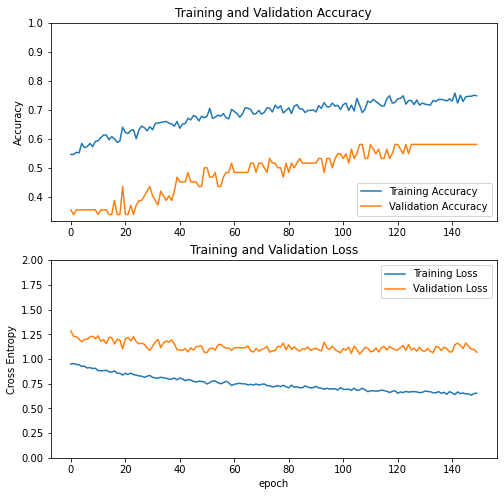

Number of layers in the base model:  86
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 7, 7, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 3)                 3075      
Total params: 3,231,939
Trainable params: 2,936,323
Non-trainable params: 295,616
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 150/200
18/18 [==============================] - 50s 3s/step - loss: 0.9784 - accuracy: 0.6212 - val_loss: 1.1064 - val_accuracy: 0.5806
Epoch 151/200
18/18 [==============================] - 47s 3s/step - loss: 0.5100 - accuracy: 0.8080 - val_loss: 1.2872 - val_accuracy: 0.5000
Epoch 152/200
18/18 [==============================] - 47s 3s/step - loss: 0.4388 - accuracy: 0.8401 - val_loss: 0.9316 - val_accuracy: 0.6290
Epoch 153/200
18/18 [==============================] - 47s 3s/step - loss: 0.3368 - accuracy: 0.8715 - val_loss: 0.8950 - val_accuracy: 0.6935
Epoch 154/200
18/18 [==============================] - 46s 3s/step - loss: 0.3264 - accuracy: 0.9060 - val_loss: 0.9282 - val_accuracy: 0.6290
Epoch 155/200
18/18 [==============================] - 47s 3s/step - loss: 0.2749 - accuracy: 0.9079 - val_loss: 1.2229 - val_accuracy: 0.6613
Epoch 156/200
18/18 [==============================] - 47s 3s/step - loss: 0.2260 - accuracy: 0.9322 - val_loss: 1.1331 - val_accuracy: 0.6129

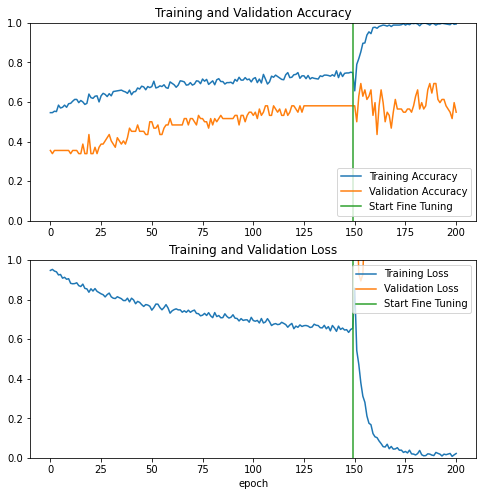

"acc = history.history['acc']\nval_acc = history.history['val_acc']\nloss = history.history['loss']\nval_loss = history.history['val_loss']\nepochs = range(len(acc))\nplt.plot(epochs, acc, 'r', label='Training acc')\nplt.plot(epochs, val_acc, 'b', label='Validation acc')\nplt.title('Training and validation accuracy')\nplt.ylabel('accuracy')  \nplt.xlabel('epoch')\nplt.legend()\nplt.figure()\nplt.plot(epochs, loss, 'r', label='Training loss')\nplt.plot(epochs, val_loss, 'b', label='Validation loss')\nplt.title('Training and validation loss')\nplt.ylabel('loss')  \nplt.xlabel('epoch')\nplt.legend()\nplt.show()"

In [ ]:



#%%
'''r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)'''

#%%

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,2.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

#%%

base_model.trainable = True

#%%

print("Number of layers in the base model: ", len(base_model.layers))

#%%

fine_tune_at = 44

#%%

for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False
  
#%%
  
model.compile(
  loss='categorical_crossentropy',
  optimizer=optimizers.RMSprop(lr=1e-4),
  metrics=['accuracy']
)  

#%%

model.summary()

#%%

len(model.trainable_variables)

#%%

fine_tune_epochs = 50
total_epochs =  initial_epochs + fine_tune_epochs

#%%
history_fine = model.fit_generator(
  training_set,
  validation_data=validation_set,
  epochs=total_epochs,
  initial_epoch=history.epoch[-1],
  steps_per_epoch=len(training_set),
  validation_steps=len(validation_set),
  callbacks=callbacks
)


#%%


acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


#%%

'''acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend()
plt.show()'''